In [6]:
import pycbc.noise
from pycbc.noise import noise_from_psd
import pycbc.psd
import pylab as plt
import pycbc.filter as pfliter
from pycbc.waveform import get_td_waveform
import random
import numpy as np
import cProfile

In [7]:
T = 4
flow = 30.0
delta_f = 1.0 / T
flen = int(2048 / delta_f) + 1
delta_t = 1.0 / 4096
tsamples = int(T / delta_t)

In [8]:
SNR_array_2 = []
random_scale = 2400

In [9]:
# PSD
psd = pycbc.psd.aLIGOZeroDetHighPower(flen, delta_f, flow)
noisesamples = int(4 / delta_t)

14 13
wvfrm = 
l =  0  SNR =  7.587226649161645  m1 =  14  m2 =  13
27 26
wvfrm = 
l =  1  SNR =  12.133508550693904  m1 =  27  m2 =  26
12 11
wvfrm = 
l =  1  SNR =  7.00766240703913  m1 =  12  m2 =  11
26 20
wvfrm = 
l =  2  SNR =  12.016509471986444  m1 =  26  m2 =  20
23 29
wvfrm = 
l =  2  SNR =  12.247358839817753  m1 =  23  m2 =  29
25 12
wvfrm = 
l =  2  SNR =  10.126980474489123  m1 =  25  m2 =  12
30 21
wvfrm = 
l =  3  SNR =  11.566102252941096  m1 =  30  m2 =  21
25 27
wvfrm = 
l =  3  SNR =  13.30506672318785  m1 =  25  m2 =  27
27 10
wvfrm = 
l =  3  SNR =  7.767316345635434  m1 =  27  m2 =  10
27 13
wvfrm = 
l =  4  SNR =  9.115462906196822  m1 =  27  m2 =  13
16 22
wvfrm = 
l =  5  SNR =  10.897991122695823  m1 =  16  m2 =  22
20 26
wvfrm = 
l =  6  SNR =  11.04799518626885  m1 =  20  m2 =  26
17 28
wvfrm = 
l =  6  SNR =  11.204851942260882  m1 =  17  m2 =  28
23 20
wvfrm = 
l =  6  SNR =  10.406641868637037  m1 =  23  m2 =  20
21 22
wvfrm = 
l =  7  SNR =  10.36614713

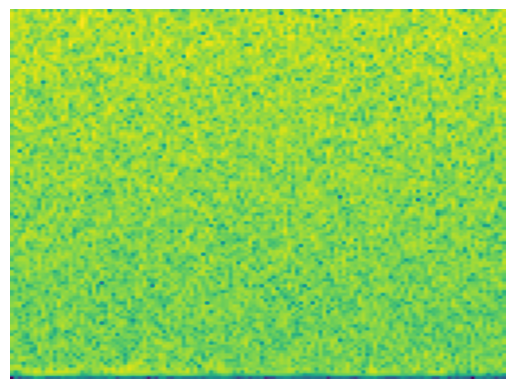

In [10]:
l = 0
while l < 100:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    # rolling:

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 4500)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_2.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if (5 < snr_peak < 8) or (8 < snr_peak < 11):
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

16 22
wvfrm = 
l =  100  SNR =  11.451922936838587  m1 =  16  m2 =  22
28 29
wvfrm = 
l =  100  SNR =  14.514976119196374  m1 =  28  m2 =  29
30 16
wvfrm = 
l =  100  SNR =  12.963872327690515  m1 =  30  m2 =  16
25 20
wvfrm = 
l =  100  SNR =  12.618076136096239  m1 =  25  m2 =  20
14 26
wvfrm = 
l =  100  SNR =  10.733682551906226  m1 =  14  m2 =  26
30 17
wvfrm = 
l =  101  SNR =  12.500818647083443  m1 =  30  m2 =  17
11 30
wvfrm = 
l =  101  SNR =  11.214835360967054  m1 =  11  m2 =  30
27 18
wvfrm = 
l =  101  SNR =  12.894344609209444  m1 =  27  m2 =  18
10 30
wvfrm = 
l =  101  SNR =  10.844783175342451  m1 =  10  m2 =  30
10 11
wvfrm = 
l =  102  SNR =  6.431586828411124  m1 =  10  m2 =  11
16 13
wvfrm = 
l =  103  SNR =  7.733648687496803  m1 =  16  m2 =  13
14 30
wvfrm = 
l =  104  SNR =  10.867117040824235  m1 =  14  m2 =  30
21 10
wvfrm = 
l =  105  SNR =  9.378909019622329  m1 =  21  m2 =  10
17 16
wvfrm = 
l =  106  SNR =  9.355797495122143  m1 =  17  m2 =  16
25 17
wvfr

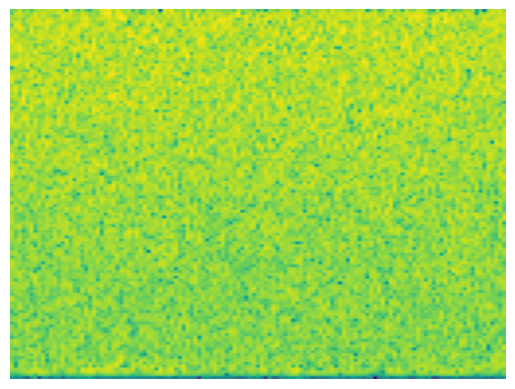

In [11]:
while l < 200:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 4500)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_2.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if (5 < snr_peak < 8) or (8 < snr_peak < 11):
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

18 16
wvfrm = 
l =  200  SNR =  10.03319213695061  m1 =  18  m2 =  16
13 17
wvfrm = 
l =  201  SNR =  9.903798630026786  m1 =  13  m2 =  17
16 29
wvfrm = 
l =  202  SNR =  10.29662757913446  m1 =  16  m2 =  29
20 14
wvfrm = 
l =  203  SNR =  11.659707445113455  m1 =  20  m2 =  14
25 16
wvfrm = 
l =  203  SNR =  11.452958539362886  m1 =  25  m2 =  16
27 22
wvfrm = 
l =  203  SNR =  14.253109628168296  m1 =  27  m2 =  22
22 12
wvfrm = 
l =  203  SNR =  8.364892761085382  m1 =  22  m2 =  12
21 17
wvfrm = 
l =  204  SNR =  10.706680755106126  m1 =  21  m2 =  17
13 25
wvfrm = 
l =  205  SNR =  9.510297730954758  m1 =  13  m2 =  25
19 11
wvfrm = 
l =  206  SNR =  8.07966993011233  m1 =  19  m2 =  11
16 24
wvfrm = 
l =  207  SNR =  10.96044873682631  m1 =  16  m2 =  24
15 25
wvfrm = 
l =  208  SNR =  10.18685993146564  m1 =  15  m2 =  25
13 25
wvfrm = 
l =  209  SNR =  10.277813119195903  m1 =  13  m2 =  25
14 16
wvfrm = 
l =  210  SNR =  8.574405220125518  m1 =  14  m2 =  16
10 25
wvfrm = 
l

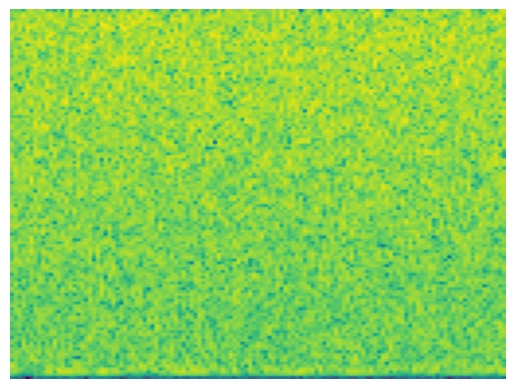

In [12]:
while l < 300:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 4500)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_2.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if (5 < snr_peak < 8) or (8 < snr_peak < 11):
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

22 23
wvfrm = 
l =  300  SNR =  12.625184022696846  m1 =  22  m2 =  23
22 20
wvfrm = 
l =  300  SNR =  12.33328554091806  m1 =  22  m2 =  20
25 10
wvfrm = 
l =  300  SNR =  8.9744745927596  m1 =  25  m2 =  10
24 14
wvfrm = 
l =  301  SNR =  8.807253408695876  m1 =  24  m2 =  14
25 30
wvfrm = 
l =  302  SNR =  13.24877207747634  m1 =  25  m2 =  30
18 19
wvfrm = 
l =  302  SNR =  11.063395856210974  m1 =  18  m2 =  19
12 21
wvfrm = 
l =  302  SNR =  9.227108455736705  m1 =  12  m2 =  21
22 18
wvfrm = 
l =  303  SNR =  10.589560351496546  m1 =  22  m2 =  18
19 24
wvfrm = 
l =  304  SNR =  11.82289159746782  m1 =  19  m2 =  24
27 26
wvfrm = 
l =  304  SNR =  12.310836585162951  m1 =  27  m2 =  26
18 30
wvfrm = 
l =  304  SNR =  11.966090961854746  m1 =  18  m2 =  30
17 27
wvfrm = 
l =  304  SNR =  11.595329318096448  m1 =  17  m2 =  27
30 23
wvfrm = 
l =  304  SNR =  14.10870045059113  m1 =  30  m2 =  23
29 16
wvfrm = 
l =  304  SNR =  9.355724693673436  m1 =  29  m2 =  16
11 18
wvfrm = 
l

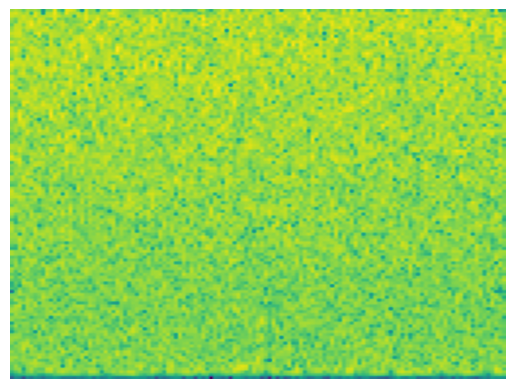

In [13]:
while l < 400:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 4500)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_2.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if (5 < snr_peak < 8) or (8 < snr_peak < 11):
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

24 12
wvfrm = 
l =  400  SNR =  10.016585729181276  m1 =  24  m2 =  12
27 27
wvfrm = 
l =  401  SNR =  13.879456653011722  m1 =  27  m2 =  27
18 13
wvfrm = 
l =  401  SNR =  6.375110271552304  m1 =  18  m2 =  13
12 10
wvfrm = 
l =  402  SNR =  6.3429472463640755  m1 =  12  m2 =  10
16 10
wvfrm = 
l =  403  SNR =  7.107875575954193  m1 =  16  m2 =  10
20 10
wvfrm = 
l =  404  SNR =  8.361516406128995  m1 =  20  m2 =  10
21 16
wvfrm = 
l =  405  SNR =  9.758018775032472  m1 =  21  m2 =  16
18 21
wvfrm = 
l =  406  SNR =  12.615907396687494  m1 =  18  m2 =  21
26 11
wvfrm = 
l =  406  SNR =  7.895796294013339  m1 =  26  m2 =  11
13 24
wvfrm = 
l =  407  SNR =  9.476597467353319  m1 =  13  m2 =  24
28 23
wvfrm = 
l =  408  SNR =  14.178077769011797  m1 =  28  m2 =  23
11 26
wvfrm = 
l =  408  SNR =  8.441530292359973  m1 =  11  m2 =  26
26 25
wvfrm = 
l =  409  SNR =  13.678197878929819  m1 =  26  m2 =  25
28 15
wvfrm = 
l =  409  SNR =  10.941273862699726  m1 =  28  m2 =  15
20 12
wvfrm =

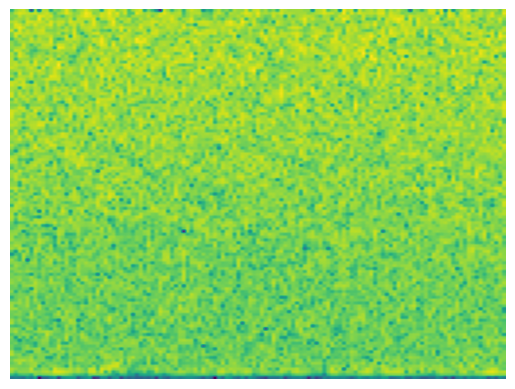

In [14]:
while l < 500:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 4500)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_2.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if (5 < snr_peak < 8) or (8 < snr_peak < 11):
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

In [15]:
while l < 500:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 4500)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_2.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if (5 < snr_peak < 8) or (8 < snr_peak < 11):
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

18 15
wvfrm = 
l =  500  SNR =  9.159827701690027  m1 =  18  m2 =  15
13 11
wvfrm = 
l =  501  SNR =  6.47434593411989  m1 =  13  m2 =  11
20 26
wvfrm = 
l =  502  SNR =  11.604983385055236  m1 =  20  m2 =  26
13 28
wvfrm = 
l =  502  SNR =  12.59544082388758  m1 =  13  m2 =  28
13 17
wvfrm = 
l =  502  SNR =  11.002324895126444  m1 =  13  m2 =  17
29 21
wvfrm = 
l =  502  SNR =  13.510561572185367  m1 =  29  m2 =  21
27 15
wvfrm = 
l =  502  SNR =  9.403452515153104  m1 =  27  m2 =  15
19 29
wvfrm = 
l =  503  SNR =  13.547078840799598  m1 =  19  m2 =  29
28 14
wvfrm = 
l =  503  SNR =  10.72621249134849  m1 =  28  m2 =  14
28 25
wvfrm = 
l =  504  SNR =  13.30239370004458  m1 =  28  m2 =  25
13 11
wvfrm = 
l =  504  SNR =  7.891199724126655  m1 =  13  m2 =  11
19 27
wvfrm = 
l =  505  SNR =  13.243077830040638  m1 =  19  m2 =  27
27 20
wvfrm = 
l =  505  SNR =  13.279098162601448  m1 =  27  m2 =  20
24 29
wvfrm = 
l =  505  SNR =  13.168618277887024  m1 =  24  m2 =  29
24 11
wvfrm = 

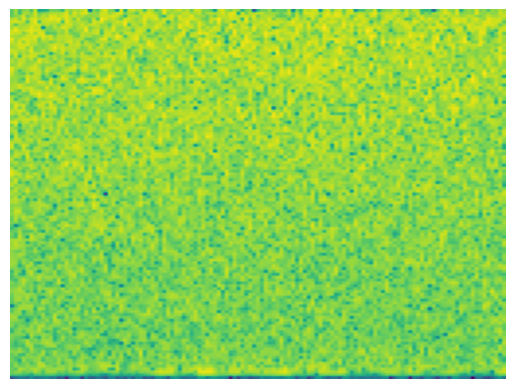

In [16]:
while l < 600:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 4500)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_2.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if (5 < snr_peak < 8) or (8 < snr_peak < 11):
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

28 29
wvfrm = 
l =  600  SNR =  15.928317540523127  m1 =  28  m2 =  29
18 10
wvfrm = 
l =  600  SNR =  6.097640976564907  m1 =  18  m2 =  10
30 29
wvfrm = 
l =  601  SNR =  13.369890511137779  m1 =  30  m2 =  29
12 20
wvfrm = 
l =  601  SNR =  9.188505088712576  m1 =  12  m2 =  20
19 19
wvfrm = 
l =  602  SNR =  10.099903669829093  m1 =  19  m2 =  19
10 24
wvfrm = 
l =  603  SNR =  9.337276184485498  m1 =  10  m2 =  24
16 26
wvfrm = 
l =  604  SNR =  10.512319264042391  m1 =  16  m2 =  26
17 16
wvfrm = 
l =  605  SNR =  9.22271346353435  m1 =  17  m2 =  16
29 10
wvfrm = 
l =  606  SNR =  8.94742146303941  m1 =  29  m2 =  10
30 26
wvfrm = 
l =  607  SNR =  15.547107180135304  m1 =  30  m2 =  26
23 24
wvfrm = 
l =  607  SNR =  11.601424991716408  m1 =  23  m2 =  24
26 14
wvfrm = 
l =  607  SNR =  11.159701307534108  m1 =  26  m2 =  14
27 28
wvfrm = 
l =  607  SNR =  13.332326038704862  m1 =  27  m2 =  28
24 11
wvfrm = 
l =  607  SNR =  11.567636426124233  m1 =  24  m2 =  11
13 24
wvfrm =

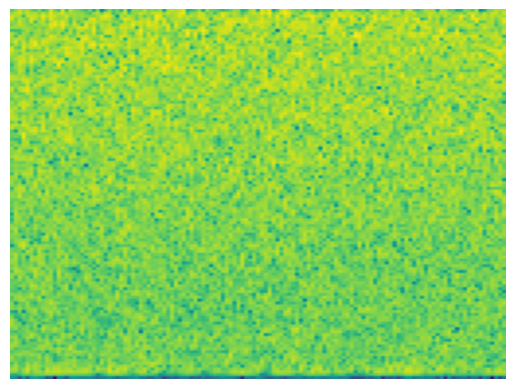

In [17]:
while l < 700:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 4500)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_2.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if (5 < snr_peak < 8) or (8 < snr_peak < 11):
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

20 20
wvfrm = 
l =  700  SNR =  12.62731095531566  m1 =  20  m2 =  20
25 19
wvfrm = 
l =  700  SNR =  10.990458240752403  m1 =  25  m2 =  19
23 28
wvfrm = 
l =  701  SNR =  12.460835149980994  m1 =  23  m2 =  28
13 30
wvfrm = 
l =  701  SNR =  8.53952422610653  m1 =  13  m2 =  30
10 28
wvfrm = 
l =  702  SNR =  8.227470114216034  m1 =  10  m2 =  28
14 29
wvfrm = 
l =  703  SNR =  9.657838030132663  m1 =  14  m2 =  29
14 24
wvfrm = 
l =  704  SNR =  11.30125803358718  m1 =  14  m2 =  24
27 13
wvfrm = 
l =  704  SNR =  9.012001163256745  m1 =  27  m2 =  13
21 11
wvfrm = 
l =  705  SNR =  7.454383286380823  m1 =  21  m2 =  11
29 25
wvfrm = 
l =  706  SNR =  12.347443847912213  m1 =  29  m2 =  25
18 10
wvfrm = 
l =  706  SNR =  8.931355384019898  m1 =  18  m2 =  10
14 21
wvfrm = 
l =  707  SNR =  10.644032019370878  m1 =  14  m2 =  21
23 23
wvfrm = 
l =  708  SNR =  11.900141727451294  m1 =  23  m2 =  23
15 14
wvfrm = 
l =  708  SNR =  10.019105598978738  m1 =  15  m2 =  14
19 12
wvfrm = 


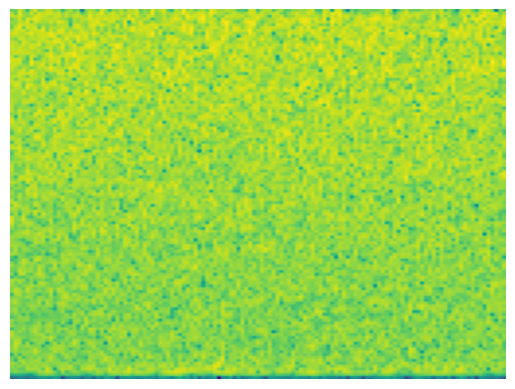

In [18]:
while l < 800:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 4500)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_2.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if (5 < snr_peak < 8) or (8 < snr_peak < 11):
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

13 13
wvfrm = 
l =  800  SNR =  9.481686994331282  m1 =  13  m2 =  13
23 22
wvfrm = 
l =  801  SNR =  12.650814928353155  m1 =  23  m2 =  22
11 17
wvfrm = 
l =  801  SNR =  8.062113297166398  m1 =  11  m2 =  17
25 15
wvfrm = 
l =  802  SNR =  11.76026691175996  m1 =  25  m2 =  15
28 21
wvfrm = 
l =  802  SNR =  13.803881534060405  m1 =  28  m2 =  21
29 26
wvfrm = 
l =  802  SNR =  12.184062717206082  m1 =  29  m2 =  26
21 30
wvfrm = 
l =  802  SNR =  12.658439233128261  m1 =  21  m2 =  30
30 14
wvfrm = 
l =  802  SNR =  8.714579186604125  m1 =  30  m2 =  14
11 13
wvfrm = 
l =  803  SNR =  7.824364857465091  m1 =  11  m2 =  13
22 27
wvfrm = 
l =  804  SNR =  14.05915605522986  m1 =  22  m2 =  27
30 29
wvfrm = 
l =  804  SNR =  16.523962299893252  m1 =  30  m2 =  29
30 27
wvfrm = 
l =  804  SNR =  13.16459310991488  m1 =  30  m2 =  27
14 20
wvfrm = 
l =  804  SNR =  8.470040829200778  m1 =  14  m2 =  20
19 20
wvfrm = 
l =  805  SNR =  10.102377739417731  m1 =  19  m2 =  20
24 22
wvfrm = 

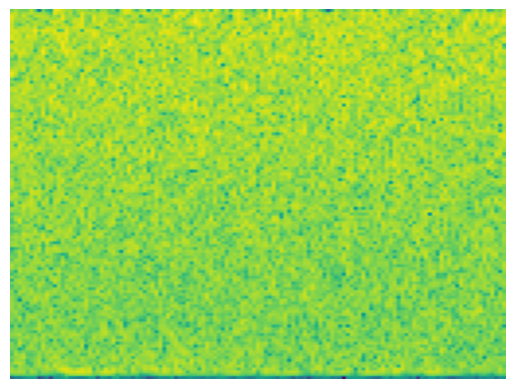

In [19]:
while l < 900:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 4500)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_2.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if (5 < snr_peak < 8) or (8 < snr_peak < 11):
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

12 30
wvfrm = 
l =  900  SNR =  8.28934328954963  m1 =  12  m2 =  30
24 10
wvfrm = 
l =  901  SNR =  6.719388989519713  m1 =  24  m2 =  10
28 28
wvfrm = 
l =  902  SNR =  15.678237542845013  m1 =  28  m2 =  28
15 12
wvfrm = 
l =  902  SNR =  9.571681649964466  m1 =  15  m2 =  12
13 21
wvfrm = 
l =  903  SNR =  9.062759708962751  m1 =  13  m2 =  21
13 18
wvfrm = 
l =  904  SNR =  7.4881478361846625  m1 =  13  m2 =  18
19 28
wvfrm = 
l =  905  SNR =  11.984073307343113  m1 =  19  m2 =  28
17 28
wvfrm = 
l =  905  SNR =  11.346779487497598  m1 =  17  m2 =  28
13 24
wvfrm = 
l =  905  SNR =  10.8297465163786  m1 =  13  m2 =  24
12 20
wvfrm = 
l =  906  SNR =  7.856832117542042  m1 =  12  m2 =  20
16 12
wvfrm = 
l =  907  SNR =  7.941972711212542  m1 =  16  m2 =  12
27 29
wvfrm = 
l =  908  SNR =  14.893584322005156  m1 =  27  m2 =  29
11 16
wvfrm = 
l =  908  SNR =  8.168114469403868  m1 =  11  m2 =  16
27 17
wvfrm = 
l =  909  SNR =  10.425210082470034  m1 =  27  m2 =  17
27 24
wvfrm = 
l

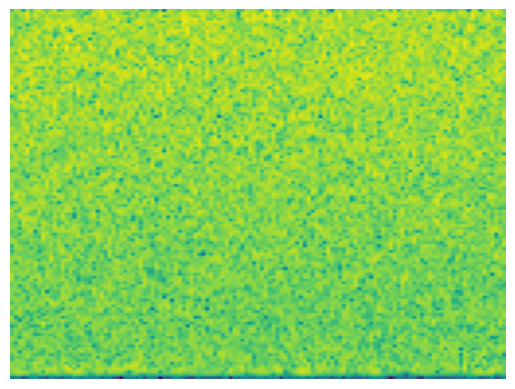

In [20]:
while l < 1000:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 4500)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_2.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if (5 < snr_peak < 8) or (8 < snr_peak < 11):
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

20 19
wvfrm = 
l =  1000  SNR =  10.035124123669238  m1 =  20  m2 =  19
20 18
wvfrm = 
l =  1001  SNR =  12.794608868982106  m1 =  20  m2 =  18
27 29
wvfrm = 
l =  1001  SNR =  15.876546587991266  m1 =  27  m2 =  29
26 18
wvfrm = 
l =  1001  SNR =  9.524100619984075  m1 =  26  m2 =  18
29 20
wvfrm = 
l =  1002  SNR =  11.262650369422095  m1 =  29  m2 =  20
15 23
wvfrm = 
l =  1002  SNR =  10.166434277977238  m1 =  15  m2 =  23
26 23
wvfrm = 
l =  1003  SNR =  13.183992842948761  m1 =  26  m2 =  23
30 13
wvfrm = 
l =  1003  SNR =  11.145039930380378  m1 =  30  m2 =  13
22 19
wvfrm = 
l =  1003  SNR =  11.33420995746825  m1 =  22  m2 =  19
21 23
wvfrm = 
l =  1003  SNR =  9.899546867802824  m1 =  21  m2 =  23
10 30
wvfrm = 
l =  1004  SNR =  8.297655882017533  m1 =  10  m2 =  30
19 18
wvfrm = 
l =  1005  SNR =  11.505167069951394  m1 =  19  m2 =  18
25 16
wvfrm = 
l =  1005  SNR =  9.816060435140773  m1 =  25  m2 =  16
20 18
wvfrm = 
l =  1006  SNR =  11.144902703357449  m1 =  20  m2 =  

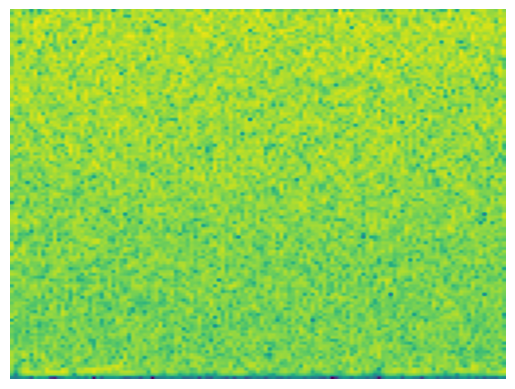

In [21]:
while l < 1100:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 4500)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_2.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if (5 < snr_peak < 8) or (8 < snr_peak < 11):
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

25 10
wvfrm = 
l =  1100  SNR =  9.338744699358983  m1 =  25  m2 =  10
19 18
wvfrm = 
l =  1101  SNR =  10.197250351355551  m1 =  19  m2 =  18
24 23
wvfrm = 
l =  1102  SNR =  12.465470124230917  m1 =  24  m2 =  23
14 23
wvfrm = 
l =  1102  SNR =  8.71755670520535  m1 =  14  m2 =  23
15 22
wvfrm = 
l =  1103  SNR =  12.023985605398776  m1 =  15  m2 =  22
15 27
wvfrm = 
l =  1103  SNR =  9.985118551973267  m1 =  15  m2 =  27
13 19
wvfrm = 
l =  1104  SNR =  7.797480703501224  m1 =  13  m2 =  19
10 24
wvfrm = 
l =  1105  SNR =  10.324138330639352  m1 =  10  m2 =  24
13 15
wvfrm = 
l =  1106  SNR =  8.444927202739457  m1 =  13  m2 =  15
30 27
wvfrm = 
l =  1107  SNR =  15.101993344460737  m1 =  30  m2 =  27
18 26
wvfrm = 
l =  1107  SNR =  10.79774189343864  m1 =  18  m2 =  26
16 21
wvfrm = 
l =  1108  SNR =  9.837646952277186  m1 =  16  m2 =  21
22 11
wvfrm = 
l =  1109  SNR =  8.873099369975188  m1 =  22  m2 =  11
17 16
wvfrm = 
l =  1110  SNR =  8.721062548750085  m1 =  17  m2 =  16
14

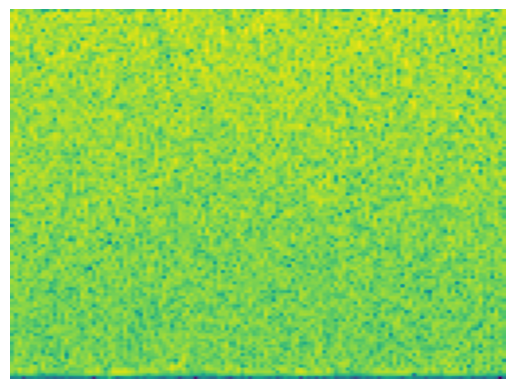

In [22]:
while l < 1200:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 4500)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_2.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if (5 < snr_peak < 8) or (8 < snr_peak < 11):
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

12 27
wvfrm = 
l =  1200  SNR =  9.412429287144471  m1 =  12  m2 =  27
22 18
wvfrm = 
l =  1201  SNR =  11.527184873386226  m1 =  22  m2 =  18
11 23
wvfrm = 
l =  1201  SNR =  8.433006948016965  m1 =  11  m2 =  23
28 26
wvfrm = 
l =  1202  SNR =  13.912941381889995  m1 =  28  m2 =  26
15 12
wvfrm = 
l =  1202  SNR =  8.614959883498749  m1 =  15  m2 =  12
14 24
wvfrm = 
l =  1203  SNR =  11.87170671876745  m1 =  14  m2 =  24
25 15
wvfrm = 
l =  1203  SNR =  9.533522350041086  m1 =  25  m2 =  15
16 16
wvfrm = 
l =  1204  SNR =  6.949201464911411  m1 =  16  m2 =  16
23 30
wvfrm = 
l =  1205  SNR =  12.516415530356095  m1 =  23  m2 =  30
10 15
wvfrm = 
l =  1205  SNR =  8.49099887322355  m1 =  10  m2 =  15
20 18
wvfrm = 
l =  1206  SNR =  9.768526817089292  m1 =  20  m2 =  18
17 21
wvfrm = 
l =  1207  SNR =  10.500255158402293  m1 =  17  m2 =  21
14 12
wvfrm = 
l =  1208  SNR =  6.209868619985985  m1 =  14  m2 =  12
28 25
wvfrm = 
l =  1209  SNR =  12.645995701104468  m1 =  28  m2 =  25
26

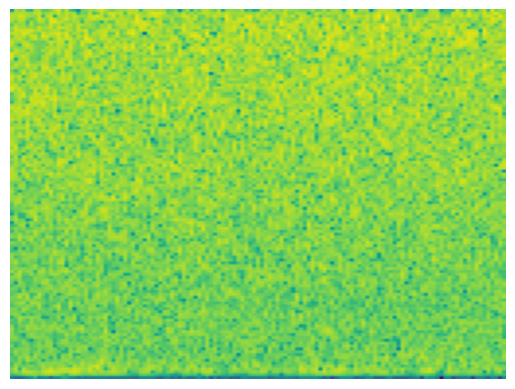

In [23]:
while l < 1300:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 4500)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_2.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if (5 < snr_peak < 8) or (8 < snr_peak < 11):
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

30 20
wvfrm = 
l =  1300  SNR =  12.615011240125673  m1 =  30  m2 =  20
24 12
wvfrm = 
l =  1300  SNR =  7.525997692354034  m1 =  24  m2 =  12
11 30
wvfrm = 
l =  1301  SNR =  8.127668284865779  m1 =  11  m2 =  30
22 18
wvfrm = 
l =  1302  SNR =  11.003736288705811  m1 =  22  m2 =  18
25 25
wvfrm = 
l =  1302  SNR =  13.376331863708153  m1 =  25  m2 =  25
13 20
wvfrm = 
l =  1302  SNR =  8.99567559180589  m1 =  13  m2 =  20
17 28
wvfrm = 
l =  1303  SNR =  10.951573558427889  m1 =  17  m2 =  28
27 21
wvfrm = 
l =  1304  SNR =  13.14908325158187  m1 =  27  m2 =  21
22 20
wvfrm = 
l =  1304  SNR =  11.86509439149753  m1 =  22  m2 =  20
10 15
wvfrm = 
l =  1304  SNR =  8.155063421659008  m1 =  10  m2 =  15
23 16
wvfrm = 
l =  1305  SNR =  9.0929282449066  m1 =  23  m2 =  16
18 18
wvfrm = 
l =  1306  SNR =  10.944442321804534  m1 =  18  m2 =  18
29 23
wvfrm = 
l =  1307  SNR =  12.187853005887279  m1 =  29  m2 =  23
16 29
wvfrm = 
l =  1307  SNR =  9.950117856344258  m1 =  16  m2 =  29
25 

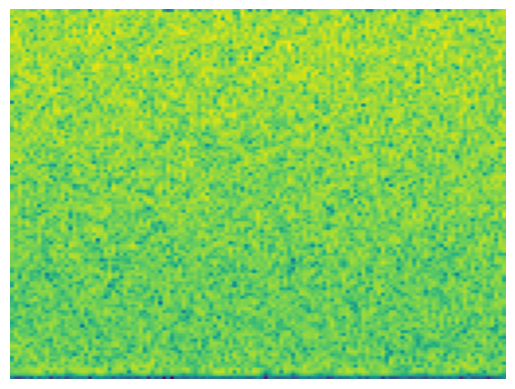

In [24]:
while l < 1400:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 4500)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_2.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if (5 < snr_peak < 8) or (8 < snr_peak < 11):
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

29 23
wvfrm = 
l =  1400  SNR =  13.269325297167235  m1 =  29  m2 =  23
30 15
wvfrm = 
l =  1400  SNR =  12.057408717239156  m1 =  30  m2 =  15
28 22
wvfrm = 
l =  1400  SNR =  13.567558185969864  m1 =  28  m2 =  22
22 14
wvfrm = 
l =  1400  SNR =  10.72831286053497  m1 =  22  m2 =  14
12 21
wvfrm = 
l =  1401  SNR =  9.73913156270252  m1 =  12  m2 =  21
24 19
wvfrm = 
l =  1402  SNR =  10.005858163419843  m1 =  24  m2 =  19
24 22
wvfrm = 
l =  1403  SNR =  11.83991100670368  m1 =  24  m2 =  22
22 12
wvfrm = 
l =  1403  SNR =  8.805550110360588  m1 =  22  m2 =  12
27 23
wvfrm = 
l =  1404  SNR =  13.177696350731468  m1 =  27  m2 =  23
29 24
wvfrm = 
l =  1404  SNR =  14.897146339796913  m1 =  29  m2 =  24
11 21
wvfrm = 
l =  1404  SNR =  9.733932804777988  m1 =  11  m2 =  21
20 19
wvfrm = 
l =  1405  SNR =  8.845382845774912  m1 =  20  m2 =  19
21 29
wvfrm = 
l =  1406  SNR =  12.647717669824106  m1 =  21  m2 =  29
28 20
wvfrm = 
l =  1406  SNR =  12.734442417155938  m1 =  28  m2 =  20

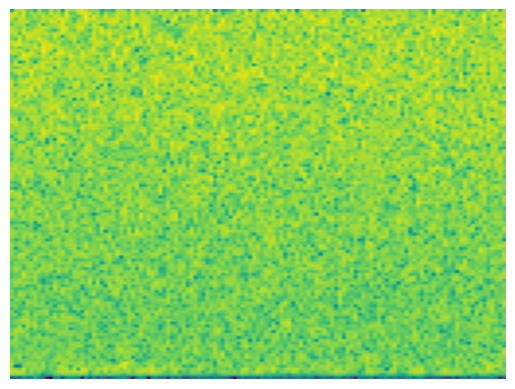

In [25]:
while l < 1500:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 4500)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_2.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if (5 < snr_peak < 8) or (8 < snr_peak < 11):
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

wavform generate random mass
scale wvfrm
add to noise
calc snr
make spectrograms
classify into folders
